# Importing Packages and Setting Global Figure Settings

In [1]:
import matplotlib
import numpy as np
# import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import spline
from math import *
from matplotlib.colors import ListedColormap,to_rgb

%matplotlib inline

In [2]:
# Settings for paper production look
# Costumizing commands: https://matplotlib.org/users/customizing.html
# more costumizing commands: https://matplotlib.org/users/dflt_style_changes.html
# Different styles: https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html
# sns.set(font_scale=1.5)
AllFontSize=18
colors=['#4878CF', '#6ACC65', '#D65F5F', '#C4AD66','#77BEDB', '#B47CC7','gray','#98b5f4','#fd97ee','#a30063']
plt.style.use('seaborn-muted')
plt.rcParams['axes.color_cycle'] = colors
plt.rcParams['figure.figsize'] = (6, 5)
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['axes.labelsize'] = AllFontSize
plt.rcParams['axes.facecolor'] ='w' 
plt.rcParams['axes.edgecolor']='k'
plt.rcParams['axes.linewidth']='0.8'
plt.rcParams['axes.grid']=True
plt.rcParams['axes.titlesize'] = AllFontSize
plt.rcParams['grid.color'] = 'BBBBBB'
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['grid.linewidth'] = 0.5
plt.rcParams['grid.alpha'] = 1
plt.rcParams['legend.fontsize'] = AllFontSize
plt.rcParams['legend.frameon'] = False 
plt.rcParams['xtick.labelsize'] = AllFontSize
plt.rcParams['ytick.labelsize'] = AllFontSize
plt.rcParams['xtick.top']=True
plt.rcParams['ytick.right']=False
plt.rcParams['xtick.minor.visible']=True
plt.rcParams['ytick.minor.visible']=True
plt.rcParams['xtick.minor.size']=2
plt.rcParams['ytick.minor.size']=2
plt.rcParams['savefig.bbox']='tight'
plt.rcParams['font.sans-serif'] = "CMU Sans Serif"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['mathtext.fontset'] = 'cm' 

C:\Users\MatheusCF\Anaconda3\lib\site-packages\matplotlib\__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


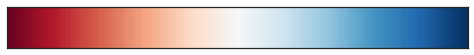

In [15]:
# http://seaborn.pydata.org/generated/seaborn.choose_colorbrewer_palette.html
# data_type : {‘sequential’, ‘diverging’}
import seaborn.apionly as sns
dpal = sns.choose_colorbrewer_palette('diverging', as_cmap=True)


# Geometries as a function of $\xi$ 

Where $$\xi={F_{cr,a}-F_{cr,x}\over F_{cr,A}} \text{ for } x\in\{B,C,D\}$$
or $$\xi={E_{eff,a}-E_{eff,x}\over E_{eff,A}} \text{ for } x\in\{B,C,D\}$$

## Parametrized Polygonal Shape Distributed Force Bend

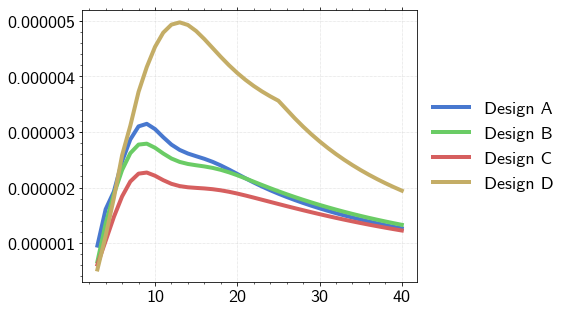

In [16]:
path='Finite_Polygonal_Parametrized/V4-DistributedForce/'

files=['DesignA','DesignB','DesignC','DesignD']
Title=['A','B','C','D']

ct=-1
for i in files:
    ct+=1
    table1 = np.genfromtxt(path+i+'_Output.txt', dtype=float, delimiter=' ')
     
    data=np.transpose(np.array([table1[:,0],table1[:,1],abs(table1[:,2])]))
    data=pd.DataFrame(data).drop_duplicates(subset=[0,1]).as_matrix()

    data=np.array(sorted(data, key=lambda a_e: (a_e[0],a_e[1])))
    
    x=np.array(data[:,0])
    y=np.array(data[:,2])
    plt.plot(x,y,label='Design {}'.format(Title[ct]))
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))

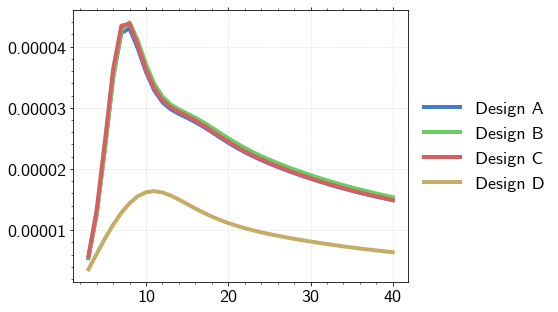

In [17]:
'''
Spacing=1,DD=0.1,E=1,nu=0.3
Data Column Information:
0: Number of Sides
1: Number of UnitCells
2: Number of Vertical Systems
3: Load
4: XDisp
5: YDisp
6: ZDisp
'''

path='Finite_Polygonal_Parametrized/V4-Stiffness_DistributedForce/'

files=['DesignA','DesignB','DesignC','DesignD']
Title=['A','B','C','D']

ct=-1
for i in files:
    ct+=1
    table1 = np.genfromtxt(path+i+'_Output.txt', dtype=float, delimiter=' ')
     
    data=np.transpose(np.array([table1[:,0],table1[:,1],table1[:,2],table1[:,3],table1[:,4],table1[:,5],table1[:,6]]))
    
    data=np.array(sorted(data, key=lambda a_e: (a_e[0],a_e[1])))
    data=pd.DataFrame(data).drop_duplicates(subset=[0,1]).as_matrix()
    
    x=data[:,0]
    z=(data[1,3]*data[1,2])/np.sqrt(data[:,4]**2+data[:,5]**2+data[:,6]**2)
    plt.plot(x,z,label='Design {}'.format(Title[ct]))
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))

## Plotting on the Same Axis

In [4]:
def ParseData(table):
    data=pd.DataFrame(table).drop_duplicates(subset=[0,1]).as_matrix()
    return np.array(sorted(data, key=lambda a_e: (a_e[0],a_e[1])))

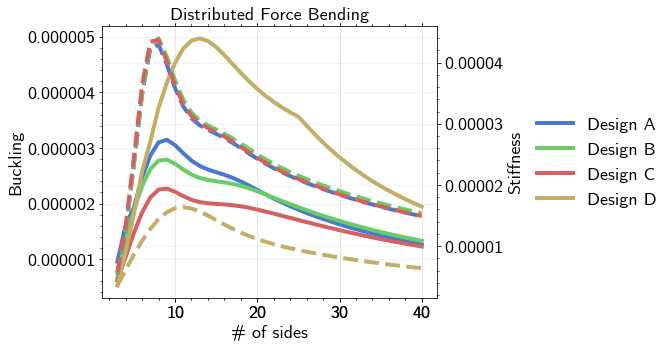

In [37]:
path='Finite_Polygonal_Parametrized/V4-DistributedForce/'
path2='Finite_Polygonal_Parametrized/V4-Stiffness_DistributedForce/'

files=['DesignA','DesignB','DesignC','DesignD']
Title=['A','B','C','D']

ct=-1
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)

for i in files:
    ct+=1
    ######### Left Axis Buckling Strength
    table1 = np.genfromtxt(path+i+'_Output.txt', dtype=float, delimiter=' ')
    data1=ParseData(table1)

    x1=np.array(data1[:,0])
    y1=np.array(abs(data1[:,2]))
    ax1.plot(x1,y1,color=colors[ct],label='Design {}'.format(Title[ct]))
    ########### Right Axis Stiffness
    table2 = np.genfromtxt(path2+i+'_Output.txt', dtype=float, delimiter=' ')
    data2=ParseData(table2)

    x2=data2[:,0]
    y2=(data2[1,3]*data2[1,2])/np.sqrt(data2[:,4]**2+data2[:,5]**2+data2[:,6]**2)
    ax2.plot(x2,y2,color=colors[ct],ls='--')
##### Plot settings
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax1.legend(loc='center left',bbox_to_anchor=(1.25, 0.5))
ax1.set_ylabel('Buckling')       
ax2.set_ylabel('Stiffness')  
ax2.set_xlabel('# of sides')       

plt.title('Distributed Force Bending')

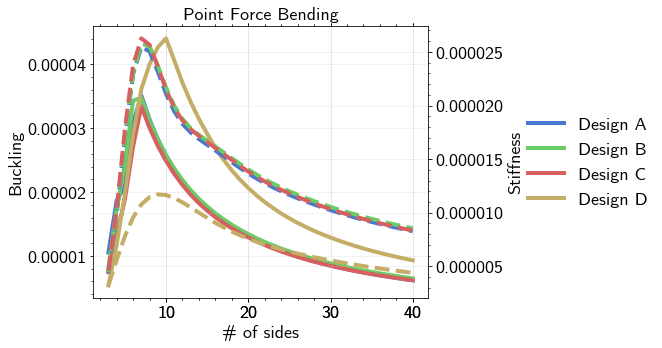

In [36]:
path='Finite_Polygonal_Parametrized/V4-PointForce/'
path2='Finite_Polygonal_Parametrized/V4-Stiffness_PointForce/'

files=['DesignA','DesignB','DesignC','DesignD']
Title=['A','B','C','D']

ct=-1
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)

for i in files:
    ct+=1
    ######### Left Axis Buckling Strength
    table1 = np.genfromtxt(path+i+'_Output.txt', dtype=float, delimiter=' ')
    data1=ParseData(table1)

    x1=np.array(data1[:,0])
    y1=np.array(abs(data1[:,2]))
    ax1.plot(x1,y1,color=colors[ct],label='Design {}'.format(Title[ct]))
    ########### Right Axis Stiffness
    table2 = np.genfromtxt(path2+i+'_Output.txt', dtype=float, delimiter=' ')
    data2=ParseData(table2)

    x2=data2[:,0]
    y2=(data2[1,3])/np.sqrt(data2[:,4]**2+data2[:,5]**2+data2[:,6]**2)
    ax2.plot(x2,y2,color=colors[ct],ls='--')
##### Plot settings
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax1.legend(loc='center left',bbox_to_anchor=(1.25, 0.5))
ax1.set_ylabel('Buckling')       
ax2.set_ylabel('Stiffness')      
ax2.set_xlabel('# of sides')       

plt.title('Point Force Bending')

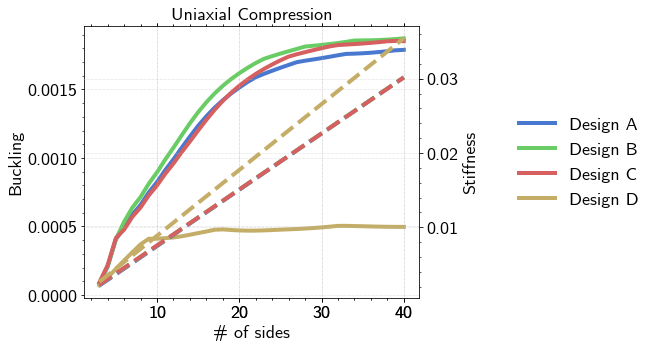

In [7]:
path='Finite_Polygonal_Parametrized/V4-Uniaxial/'
path2='Finite_Polygonal_Parametrized/V4-Stiffness_Uniaxial/'

files=['DesignA','DesignB','DesignC','DesignD']
Title=['A','B','C','D']

ct=-1
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)

for i in files:
    ct+=1
    ######### Left Axis Buckling Strength
    table1 = np.genfromtxt(path+i+'_Output.txt', dtype=float, delimiter=' ')
    data1=ParseData(table1)

    x1=np.array(data1[:,0])
    y1=np.array(abs(data1[:,2]))
    ax1.plot(x1,y1,color=colors[ct],label='Design {}'.format(Title[ct]))
    ########### Right Axis Stiffness
    table2 = np.genfromtxt(path2+i+'_Output.txt', dtype=float, delimiter=' ')
    data2=ParseData(table2)

    x2=data2[:,0]
    y2=(data2[1,3])/np.sqrt(data2[:,4]**2+data2[:,5]**2+data2[:,6]**2)
    ax2.plot(x2,y2,color=colors[ct],ls='--')
##### Plot settings
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax1.legend(loc='center left',bbox_to_anchor=(1.25, 0.5))
ax1.set_ylabel('Buckling')       
ax2.set_ylabel('Stiffness')      
ax2.set_xlabel('# of sides')       

plt.title('Uniaxial Compression')

## Planar Extruded Geometry

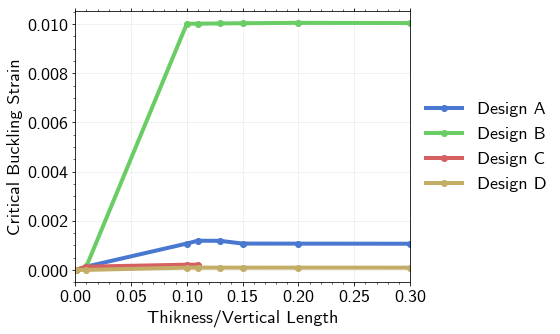

In [6]:
'''
Data Information:
Col0: Thickness
Col1: Number of Vertical Unit Cells
Col2: Number of Horizontal Unit Cells
Col3: Applied Y Displacement
Col4-9: EigenValues in ranking order or size (4 smallest - 9 largest)
'''

path='Planar_Extruded/V1-Uniaxial/'

files=['DesignA','DesignB','DesignC','DesignD']
Title=['A','B','C','D']
ct=-1

for i in files:
    ct+=1

    table = np.genfromtxt(path+i+'_Output.txt', dtype=float, delimiter=' ')
    data=pd.DataFrame(table).drop_duplicates(subset=[0,1]).as_matrix()
    
    x1=np.array(data[:,0]/(2*data[1,1]))
    y1=np.array(abs(data[:,4])/(data[1,1]*2))
    plt.plot(x1,y1,'o-',color=colors[ct],label='Design {}'.format(Title[ct]))
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
plt.xlim([0,.3])
plt.xlabel('Thikness/Vertical Length')
plt.ylabel('Critical Buckling Strain')